In [1]:
import numpy as np
import zlib
import matplotlib.pyplot as plt
from PIL import Image
import io

In [3]:
def lossless_compress_decompress(image_path):
    # Read the original image in grayscale
    original_image = Image.open(image_path).convert('L')
    original_image_np = np.array(original_image)

    # Convert the image to bytes
    image_bytes = original_image_np.tobytes()

    # Calculate the original size in kilobytes
    original_size_kb = len(image_bytes) / 1024

    # Compress the image
    compressed_image = zlib.compress(image_bytes)

    # Calculate the compressed size in kilobytes
    compressed_size_kb = len(compressed_image) / 1024

    # Decompress the image
    decompressed_bytes = zlib.decompress(compressed_image)

    # Convert bytes back to image
    decompressed_image = np.frombuffer(decompressed_bytes, dtype=np.uint8).reshape(original_image_np.shape)

    # Display the original and decompressed images
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(original_image_np, cmap='gray')
    ax[0].set_title('Original Image')
    ax[1].imshow(decompressed_image, cmap='gray')
    ax[1].set_title('Decompressed Image')
    plt.show()

    # Display file sizes
    print(f"Original Image Size: {original_size_kb:.2f} KB")
    print(f"Compressed Image Size: {compressed_size_kb:.2f} KB")

    # Verify if the decompression is lossless
    if np.array_equal(original_image_np, decompressed_image):
        print("The decompression is lossless.")
    else:
        print("The decompression is not lossless.")

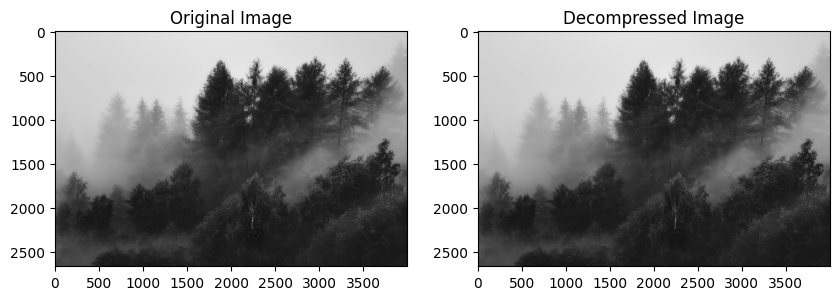

Original Image Size: 10414.06 KB
Compressed Image Size: 4613.20 KB
The decompression is lossless.


In [4]:
lossless_compress_decompress('pexels-eberhard-grossgasteiger-1367192.jpg')

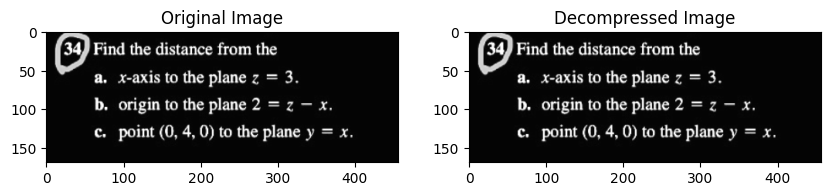

Original Image Size: 75.42 KB
Compressed Image Size: 21.04 KB
The decompression is lossless.


In [5]:
lossless_compress_decompress('image.png')